## Heart Failure Clinical Record

Data ini merecord pasien yang memiliki riwayat gagal jantung, yang dicatat selama periode penanganan.

Informasi atribut dari data yang akan dianalisa:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the - blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

In [1]:
import pandas as pd

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv", sep=",")


In [ ]:
df.shape

(299, 13)

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Data Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


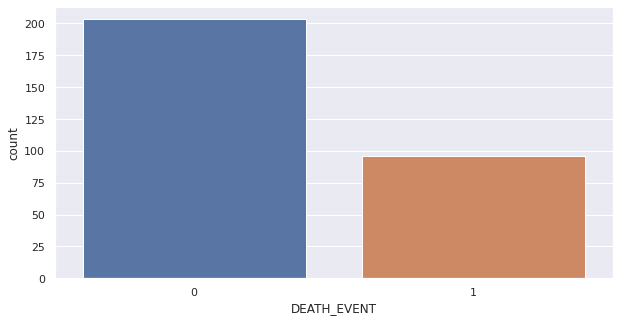

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(df['DEATH_EVENT'])

In [ ]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

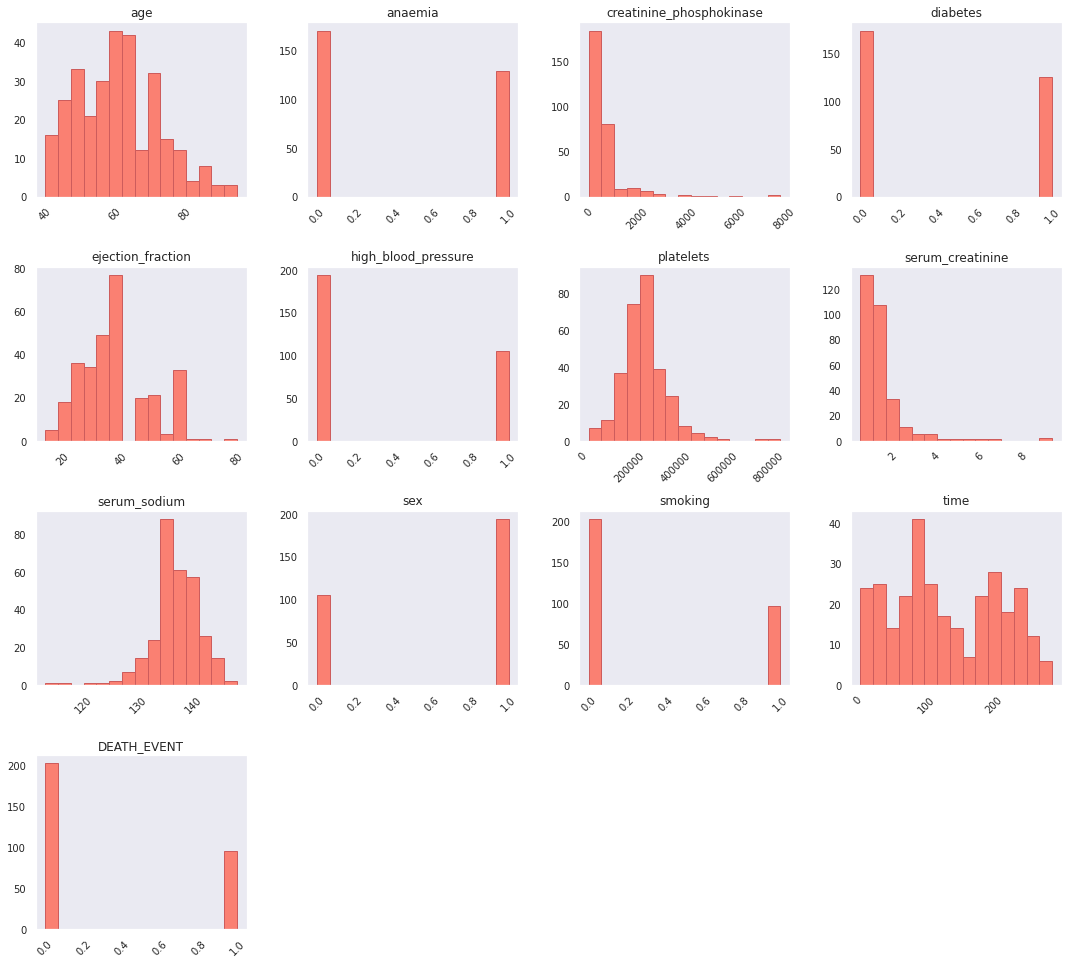

In [ ]:
fig = df.hist(bins=15, color='salmon', edgecolor='indianred',
linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0,
figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [4]:
X=df.iloc[:,:-1]
Y=df['DEATH_EVENT']


Split data

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


### SVM Linear

Text(0, 0.5, 'Accuracy')

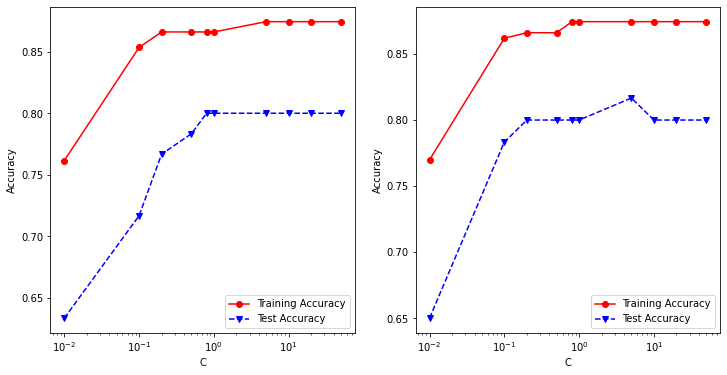

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = linear_model.LogisticRegression(C=param)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    LRtrainAcc.append(accuracy_score(y_train, y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

### SVM NonLinear

Text(0, 0.5, 'Accuracy')

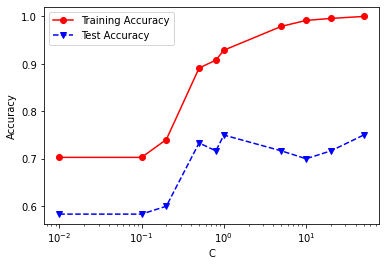

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

### ANN

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp.fit(x_train,y_train)
predict_test = mlp.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict_test)))

Accuracy: 0.68


Text(0, 0.5, 'Accuracy')

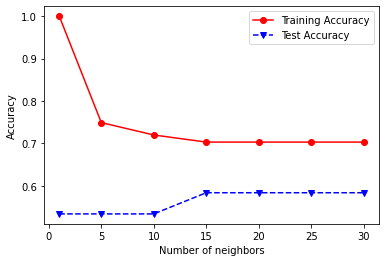

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

models=[LogisticRegression(),
  LinearSVC(),
  SVC(kernel='rbf'),
  KNeighborsClassifier(),
  RandomForestClassifier(),
  DecisionTreeClassifier(),
  GradientBoostingClassifier(),
  MLPClassifier(),
  GaussianNB(),
  AdaBoostClassifier()
  ]
model_names=['LogisticRegression','LinearSVM','rbfSVM',
'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
'GradientBoostingClassifier','ANN', 'GaussianNB','AdaBoostClassifier']

In [12]:
acc=[]
eval_acc={}
for model in range(len(models)):
  classification_model=models[model]
  classification_model.fit(x_train,y_train)
  pred=classification_model.predict(x_test)
  acc.append(accuracy_score(pred,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'Accuracy': [0.8,
  0.8166666666666667,
  0.75,
  0.6833333333333333,
  0.7666666666666667,
  0.6666666666666666,
  0.7333333333333333,
  0.7333333333333333,
  0.7,
  0.75],
 'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'ANN',
  'GaussianNB',
  'AdaBoostClassifier']}

In [8]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
1,LinearSVM,0.816667
0,LogisticRegression,0.800000
4,RandomForestClassifier,0.783333
7,ANN,0.783333
2,rbfSVM,0.750000
9,AdaBoostClassifier,0.750000
6,GradientBoostingClassifier,0.733333
8,GaussianNB,0.700000
3,KNearestNeighbors,0.683333
5,DecisionTree,0.666667


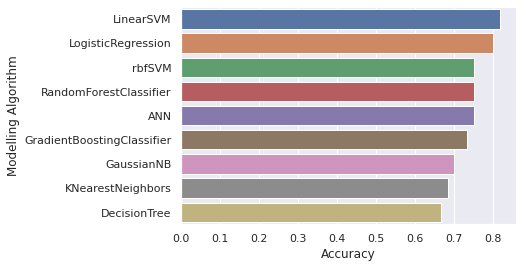

In [ ]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

Dari diagram di atas terlihat bahwa akurasi Random Forest Classifier (ensemble) lebih tinggi dari pada Decision Tree (single predictor)

## Ensemble

### Bagging Classifier

In [11]:
#from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

# Pipeline Estimator
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
#
# Fit the model
#
pipeline.fit(x_train, y_train)
#
# Model scores on test and training data


print('Model test Score: %.3f, ' %pipeline.score(x_test, y_test),
      'Model training Score: %.3f' %pipeline.score(x_train, y_train))

Model test Score: 0.800,  Model training Score: 0.866


Dari hasil akurasi Bagging Classifier (ensemble) terlihat lebih tinggi dari pada Logistic Regression (Single predictor)

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

# Fit the model

forest.fit(x_train, y_train)
 
## Measure model performance

y_predTrain = forest.predict(x_train)
y_predTest = forest.predict(x_test)



print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))

Model training Score: 0.979 Model test Score: 0.750


### Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=1.0, max_depth=1, 
                                 random_state=0).fit(x_train, y_train)
#clf.score(x_test, y_test)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)



print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))

Model training Score: 0.996 Model test Score: 0.750


### AdaBoost

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)

y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)



print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))

Model training Score: 0.996 Model test Score: 0.733


### Gradient Tree Boosting Classification

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(x_train, y_train)

y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)



print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))

Model training Score: 0.996 Model test Score: 0.750


### Histogram-Based Gradient Boosting

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=100).fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)



print('Model training Score: %.3f' % accuracy_score(y_train, y_predTrain),
      'Model test Score: %.3f' %accuracy_score(y_test, y_predTest))

Model training Score: 1.000 Model test Score: 0.750


### Voting Classifier

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.06) [Logistic Regression]
Accuracy: 0.87 (+/- 0.06) [Random Forest]
Accuracy: 0.78 (+/- 0.05) [naive Bayes]
Accuracy: 0.84 (+/- 0.07) [Ensemble]


### Stacked Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svm', LinearSVC(max_iter=10000))
      ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )

clf.fit(x_train, y_train)
y_predTrain = clf.predict(x_train)
y_predTest = clf.predict(x_test)

print('Stacked Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(y_train, y_predTrain),
    accuracy_score(y_test, y_predTest)
))

Stacked Classifier:
> Accuracy on training data = 0.9456
> Accuracy on test data = 0.7667
